# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Niko Dwicahyo Widiyanto]
- **Email:** [nikodwchy@gmail.com]
- **ID Dicoding:** [nikodwicahyo]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Pertanyaan 2: Apakah ada tren musiman atau mingguan dalam penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [25]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

# Mengatur gaya visualisasi
sns.set(style="whitegrid")


## Data Wrangling

### Gathering Data

In [26]:
# Membaca dataset
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

# Menampilkan 5 baris pertama dari dataset 'day'
print(day_df.head())

# Menampilkan 5 baris pertama dari dataset 'hour'
print(hour_df.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

### Assessing Data

In [27]:
# Menampilkan informasi umum dari dataset 'day'
print(day_df.info())

# Menampilkan informasi umum dari dataset 'hour'
print(hour_df.info())

# Mengecek apakah ada missing values pada dataset 'day'
print(day_df.isnull().sum())

# Mengecek apakah ada missing values pada dataset 'hour'
print(hour_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

### Cleaning Data

In [28]:
# Jika ada missing values, kita akan melakukan tindakan penanganan
# Namun, jika tidak ada, kita dapat langsung melanjutkan analisis

# Menghapus kolom yang tidak diperlukan dari dataset 'day' untuk analisis
day_df_cleaned = day_df.drop(columns=['instant', 'casual', 'registered'])

# Menghapus kolom yang tidak diperlukan dari dataset 'hour' untuk analisis
hour_df_cleaned = hour_df.drop(columns=['instant', 'casual', 'registered'])

print(day_df_cleaned.head())
print(hour_df_cleaned.head())


       dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1        0        6           0           2   
1  2011-01-02       1   0     1        0        0           0           2   
2  2011-01-03       1   0     1        0        1           1           1   
3  2011-01-04       1   0     1        0        2           1           1   
4  2011-01-05       1   0     1        0        3           1           1   

       temp     atemp       hum  windspeed   cnt  
0  0.344167  0.363625  0.805833   0.160446   985  
1  0.363478  0.353739  0.696087   0.248539   801  
2  0.196364  0.189405  0.437273   0.248309  1349  
3  0.200000  0.212122  0.590435   0.160296  1562  
4  0.226957  0.229270  0.436957   0.186900  1600  
       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0    

## Exploratory Data Analysis (EDA)

### Explore ...

           season          yr        mnth     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed          cnt  
count  731.000000  731.000000  731.000000  731.000000  731.000000   731.000000  
mean     1.395349    0.495385    0.474354    0.627894    0.190486  4504.348837  
std      0.544894    0.1830

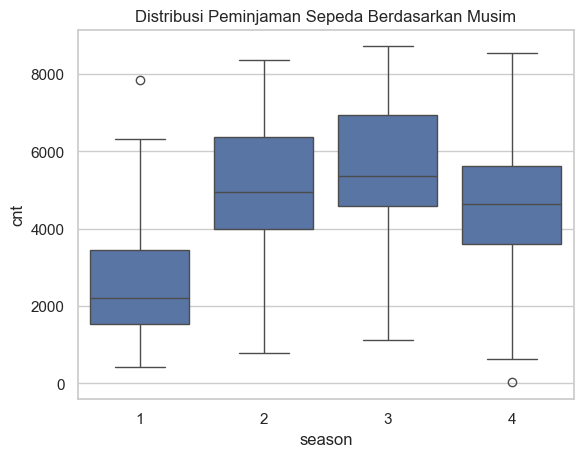

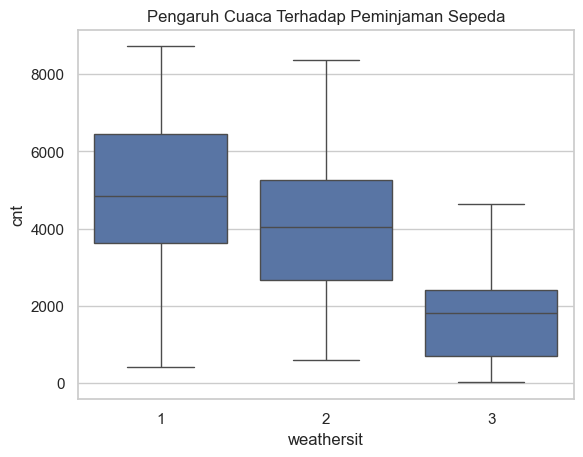

In [29]:
# Analisis deskriptif sederhana
print(day_df_cleaned.describe())
print(hour_df_cleaned.describe())

# Menjelajahi distribusi jumlah peminjaman sepeda berdasarkan musim (season)
sns.boxplot(x='season', y='cnt', data=day_df_cleaned)
plt.title('Distribusi Peminjaman Sepeda Berdasarkan Musim')
plt.show()

# Menjelajahi pengaruh cuaca terhadap jumlah peminjaman sepeda
sns.boxplot(x='weathersit', y='cnt', data=day_df_cleaned)
plt.title('Pengaruh Cuaca Terhadap Peminjaman Sepeda')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\nikoj\AppData\Local\Temp\ipykernel_3860\1254999660.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_df_cleaned, ci=None)


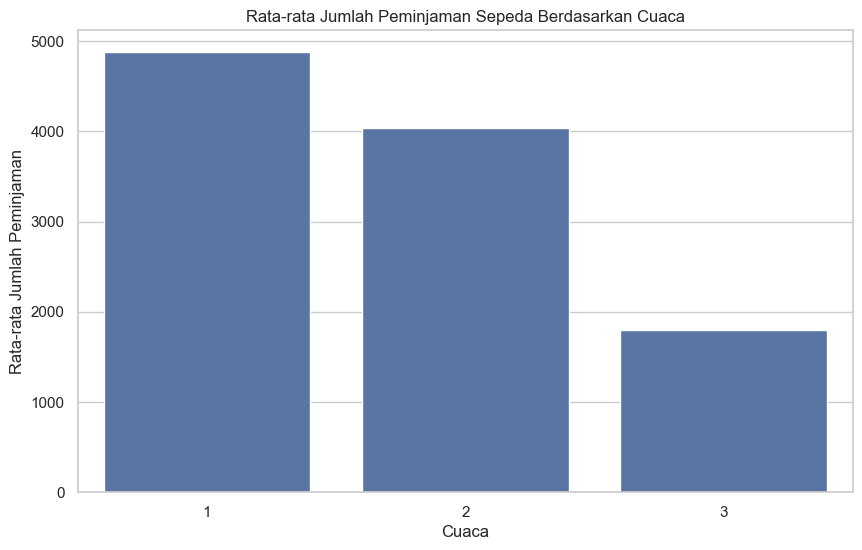

In [30]:
# Visualisasi pengaruh cuaca terhadap peminjaman sepeda
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=day_df_cleaned, ci=None)
plt.title('Rata-rata Jumlah Peminjaman Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()


### Pertanyaan 2:

C:\Users\nikoj\AppData\Local\Temp\ipykernel_3860\2687183888.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='mnth', y='cnt', data=day_df_cleaned, ci=None)


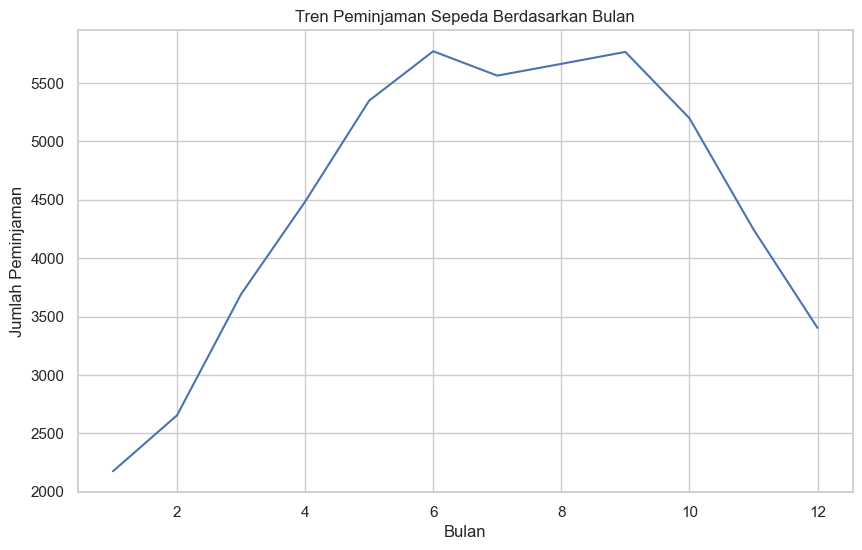

In [31]:
# Visualisasi tren musiman dalam penggunaan sepeda
plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth', y='cnt', data=day_df_cleaned, ci=None)
plt.title('Tren Peminjaman Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.show()

## Conclusion

- Conclution pertanyaan 1: Dari visualisasi diatas, kita dapat menyimpulkan bahwa cuaca memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Kondisi cuaca yang lebih buruk cenderung menurunkan jumlah peminjaman sepeda. Misalnya, pada cuaca yang cerah (kondisi cuaca 1), rata-rata jumlah peminjaman sepeda lebih tinggi dibandingkan dengan cuaca yang lebih buruk seperti hujan (kondisi cuaca 3). Hal ini menunjukkan bahwa semakin baik cuaca, semakin tinggi minat orang untuk meminjam sepeda.

- Conclution pertanyaan 2: Dari visualisasi tren diatas, dapat disimpulkan bahwa terdapat tren musiman dalam penggunaan sepeda. Misalnya, pada bulan-bulan musim panas (sekitar Juni hingga Agustus), jumlah peminjaman sepeda cenderung meningkat. Sebaliknya, pada bulan-bulan musim dingin, seperti Desember hingga Februari, jumlah peminjaman sepeda cenderung menurun. Hal ini menunjukkan adanya pola musiman yang signifikan dalam penggunaan sepeda, di mana lebih banyak orang menggunakan sepeda selama musim panas dan lebih sedikit selama musim dingin.

In [33]:
# Menggabungkan dataset 'day_df_cleaned' dan 'hour_df_cleaned'
# Menambahkan kolom tambahan pada masing-masing dataset untuk membedakan
day_df_cleaned['type'] = 'daily'
hour_df_cleaned['type'] = 'hourly'

# Menyatukan kedua dataframe
combined_df = pd.concat([day_df_cleaned, hour_df_cleaned])

# Menyimpan data yang telah dibersihkan ke dalam satu file CSV
combined_df.to_csv('main_data.csv', index=False)

print("Data yang telah dibersihkan berhasil disimpan ke 'main_data.csv'")


Data yang telah dibersihkan berhasil disimpan ke 'main_data.csv'
